# Test scikit-image structural similarity between Web GUIs

## Import libraries

In [31]:
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Images loading and processing

In [32]:
# Set images paths
IMAGE_A_PATH = "img1_original.png"
IMAGE_B_PATH = "img1_modified.png"

In [33]:
# Load images
imageA = cv2.imread("data/" + IMAGE_A_PATH)
imageB = cv2.imread("data/" + IMAGE_B_PATH)

# Make the two images dimensions match
imageB = cv2.resize(imageB, (imageA.shape[1], imageA.shape[0]))

imageA_gray = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
imageB_gray = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)


## Display processed images

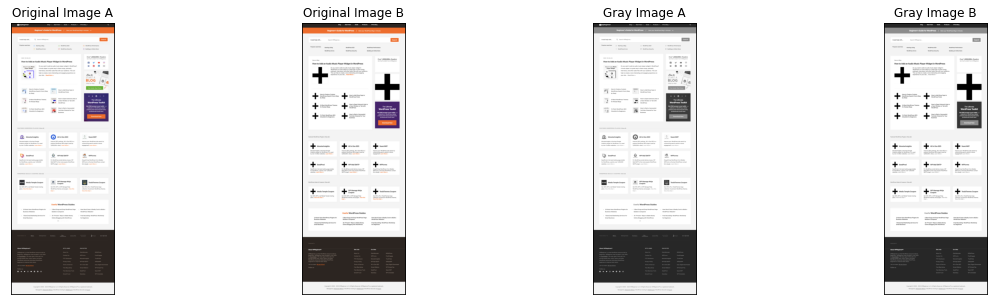

In [34]:
# Display the images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Show original images
axs[0].imshow(cv2.cvtColor(imageA, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image A')
axs[1].imshow(cv2.cvtColor(imageB, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image B')

# Show images after converting to grayscale
axs[2].imshow(imageA_gray, cmap='gray')
axs[2].set_title('Gray Image A')
axs[3].imshow(imageB_gray, cmap='gray')
axs[3].set_title('Gray Image B')

# Remove the x and y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## Calculate and print structural similarity index

In [35]:
# Compute SSIM between two images
ssim_index, gradient, ssim_map = ssim(imageA_gray, imageB_gray, full=True, gradient=True)

print(f"Image similarity index: {ssim_index:.3f}")

Image similarity index: 0.717


## Plot SSIM map and gradient map

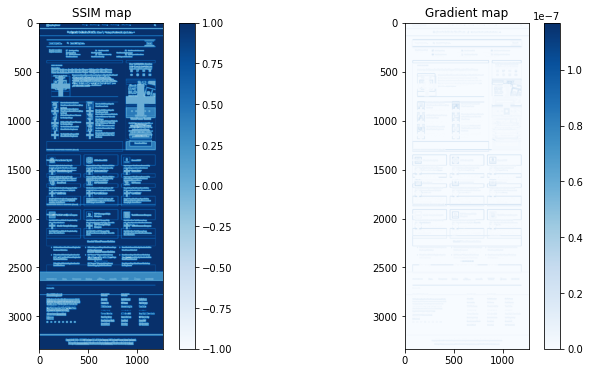

In [36]:
# Show the SSIM map 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ssim_map, cmap='Blues', vmin=-1, vmax=1)
plt.colorbar()
plt.title("SSIM map")

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(np.square(gradient))

# Show the gradient map
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='Blues')
plt.colorbar()
plt.title("Gradient map")
plt.show()